In [1]:
import pytse_client as tse
import statistics as st
import numpy as np
import pandas as pd 
from pandas_datareader import data as pdr 
import mplfinance as mpf
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 


In [2]:
ticker = tse.Ticker("شتران", adjust=True)
real_time_data = ticker.get_ticker_real_time_info_response()
#print(' پیشنهادات خرید =',real_time_data.buy_orders) 
#print('پیشنهادات فروش =',real_time_data.sell_orders) 
#print('قیمت بهترین تقاضا =', real_time_data.best_supply_price)  
#print('حجم بهترین تقاضا =',real_time_data.best_supply_vol)  
#print('قیمت بهترین عرضه =',real_time_data.best_demand_price)  
#print('حجم بهترین عرضه =',real_time_data.best_demand_vol)  
#print('وضعیت نماد =',real_time_data.state)  
print('قیمت آخرین معامله =',real_time_data.last_price) 
print('قیمت پایانی =',real_time_data.adj_close)  
#print('قیمت دیروز =',real_time_data.yesterday_price)  
#print('قیمت اولین معامله =',real_time_data.open_price)  
print('قیمت حداکثر =',real_time_data.high_price)  
print('قیمت حداقل =',real_time_data.low_price)  
#print('تعداد معاملات =', real_time_data.count)   
#print('حجم معاملات =',real_time_data.volume)   
#print('ارزش معاملات =',real_time_data.value)   
#print('آخرین اطلاعات قیمت ناشی از تغییرات شرکتی و معاملات =',real_time_data.last_date) 

قیمت آخرین معامله = 5280
قیمت پایانی = 5270
قیمت حداکثر = 5330
قیمت حداقل = 5150


In [3]:
trade_details = ticker.get_trade_details()
trade_details.to_csv("C:/Users/Kazem Kamrani/Desktop/Jupyter/DayInfo.csv",header = True)
print(trade_details)

C:\Users\Kazem Kamrani\anaconda3\lib\site-packages\bs4\builder\__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


          date  volume   price
0     09:00:29   68992  5200.0
1     09:00:29   40952  5200.0
2     09:00:29   31937  5200.0
3     09:00:29   30000  5200.0
4     09:00:29   18744  5200.0
...        ...     ...     ...
3597  12:15:50   63146  5280.0
3598  12:15:53   36854  5280.0
3599  12:15:53    5146  5280.0
3600  12:16:05    1000  5290.0
3601  12:16:19     539  5280.0

[3602 rows x 3 columns]


In [4]:
DayData = pd.read_csv("C:/Users/Kazem Kamrani/Desktop/Jupyter/DayInfo.csv", index_col = "date",
                 parse_dates = True,
                 na_values=['nan'])
DayData['open'] = DayData['price']
DayData['high'] = DayData['price']
DayData['low'] = DayData['price']
DayData['close'] = DayData['price']
DayData = pd.DataFrame(DayData)
print ('Mean is ',np.mean(DayData['price']) )
print ('Standard Deviation is ',np.std(DayData['price']))
print(DayData)

Mean is  5268.198223209328
Standard Deviation is  39.58420227288092
                     Unnamed: 0  volume   price    open    high     low  \
date                                                                      
2022-07-03 09:00:29           0   68992  5200.0  5200.0  5200.0  5200.0   
2022-07-03 09:00:29           1   40952  5200.0  5200.0  5200.0  5200.0   
2022-07-03 09:00:29           2   31937  5200.0  5200.0  5200.0  5200.0   
2022-07-03 09:00:29           3   30000  5200.0  5200.0  5200.0  5200.0   
2022-07-03 09:00:29           4   18744  5200.0  5200.0  5200.0  5200.0   
...                         ...     ...     ...     ...     ...     ...   
2022-07-03 12:15:50        3597   63146  5280.0  5280.0  5280.0  5280.0   
2022-07-03 12:15:53        3598   36854  5280.0  5280.0  5280.0  5280.0   
2022-07-03 12:15:53        3599    5146  5280.0  5280.0  5280.0  5280.0   
2022-07-03 12:16:05        3600    1000  5290.0  5290.0  5290.0  5290.0   
2022-07-03 12:16:19        3601 

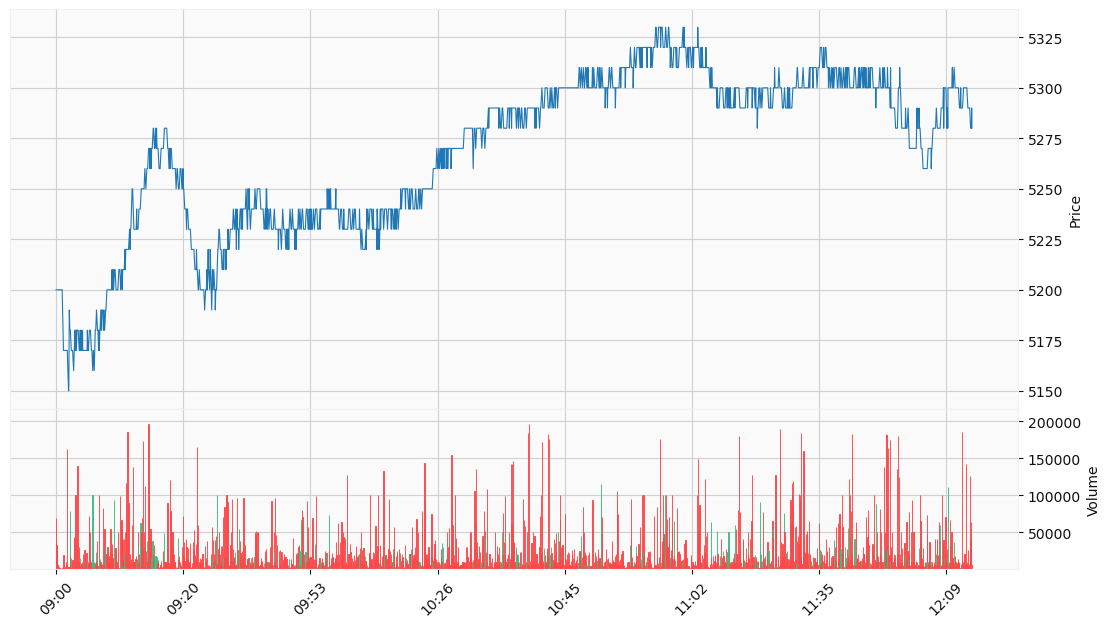

In [5]:
mpf.plot(DayData,type="line", volume = True, style = 'yahoo' ,figsize=(14,8))

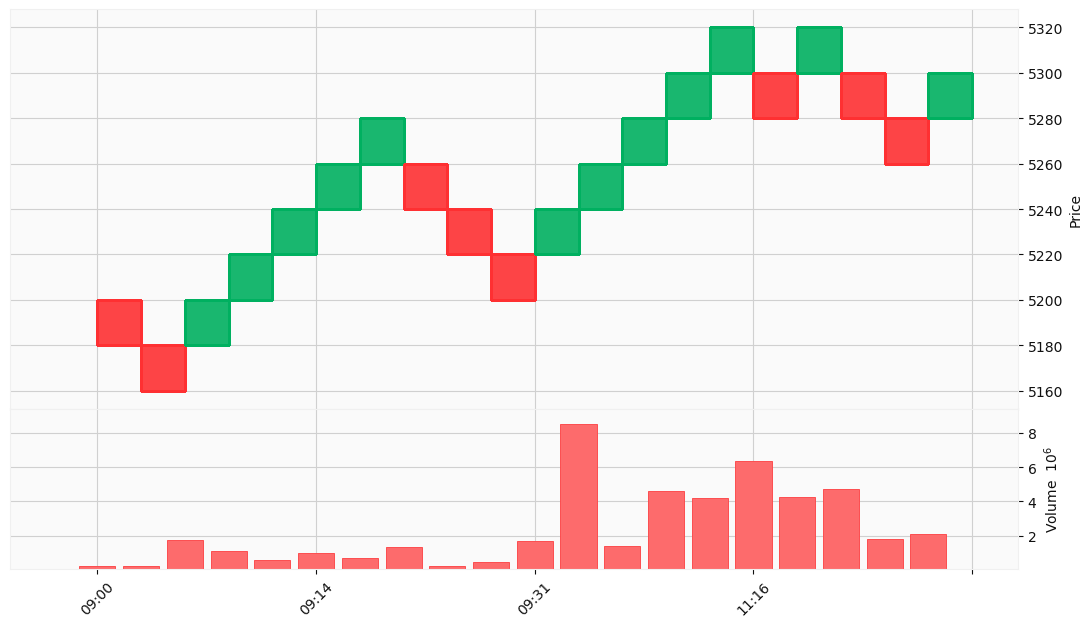

In [6]:
mpf.plot(DayData,type="renko", volume = True, style = 'yahoo' , renko_params = dict(brick_size =20),mav=50,
         figsize=(14,8))

In [7]:
DayData['open'] = np.log(DayData['open'])
DayData['high'] = np.log(DayData['high'])
DayData['low'] = np.log(DayData['low'])
DayData['close'] = np.log(DayData['close'])
print ('Mean is ',np.mean(DayData['close']) )
print ('Standard Deviation is ',np.std(DayData['close']))
#print(DayData)

Mean is  8.569415363883587
Standard Deviation is  0.007533270203745989


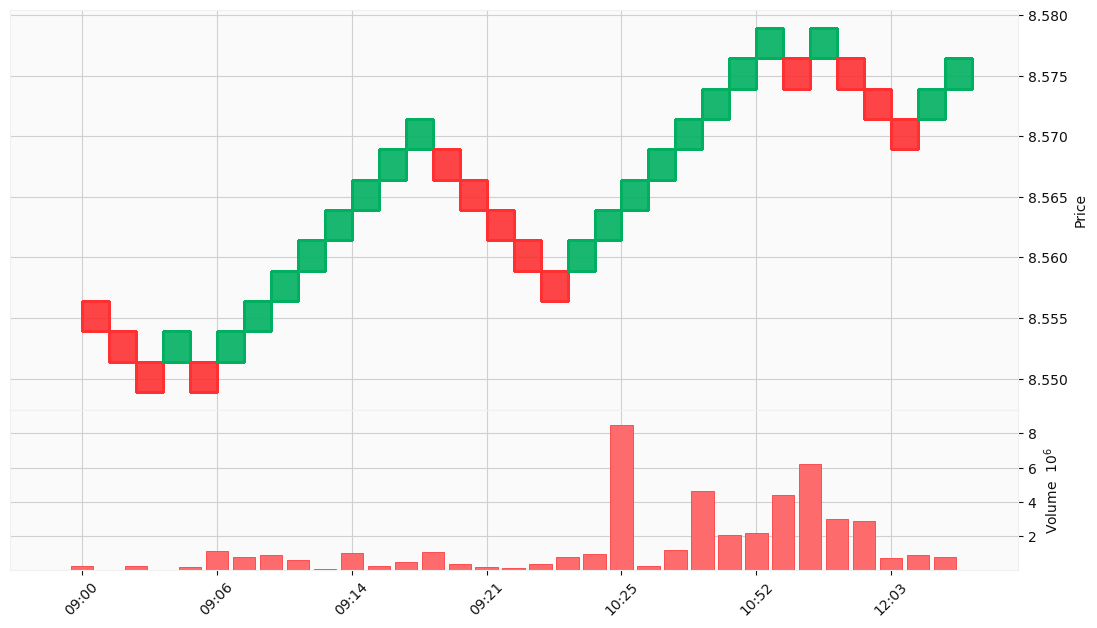

In [8]:
mpf.plot(DayData,type="renko",volume = True,style = 'yahoo',renko_params = dict(brick_size = 0.0025),figsize=(14,8))